In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
db=pd.read_csv("rischio cuore.csv")
print(db.head())

   id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP diaBP  heartRate  glucose  \
0             0         0    221.0    148    85       90.0     80.0   
1             1         0    212.0    168    98       72.0     75.0   
2             0         0    250.0    116    71       88.0     94.0   
3             1         0    233.0    158    88       68.0     94.0   
4             0         0    241.0  136,5    85       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0  


Text(0.5, 1.0, 'cigsperday o average for age')

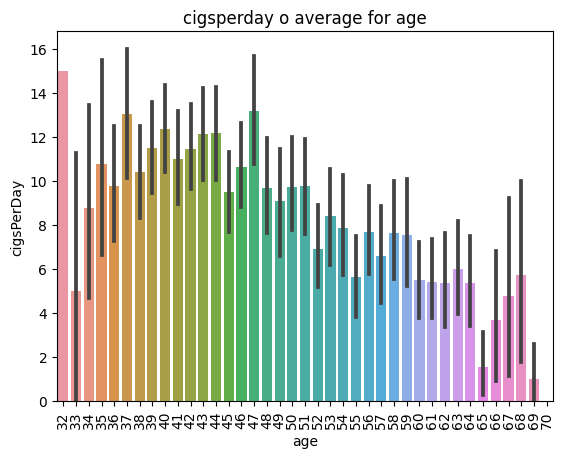

In [4]:
# average cigsperday is bigger in younger people
sns.barplot(x="age", y="cigsPerDay", data=db)
plt.xticks(rotation=90)
plt.title("cigsperday o average for age")

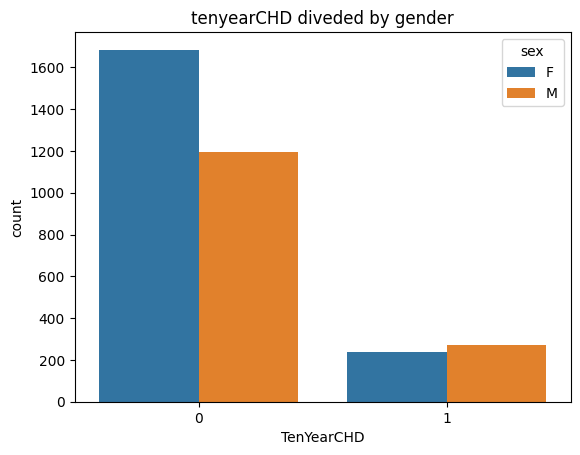

In [5]:
sns.countplot(data=db, x="TenYearCHD",hue="sex")
plt.title("tenyearCHD diveded by gender")
plt.show()
#there are more male with tenyearCHD

In [6]:
#Extracting data about male and female smokers and non-smokers
donnefumatrici=(db[(db["sex"]=="F")&(db["is_smoking"]=="YES")])
print(donnefumatrici.count()["id"])
#776 female smokers
print(db[db["sex"]=="F"].count()["id"]) 
#1923 tot female
print(db[db["sex"]=="M"].count()["id"])
uominifumatori=(db[(db["sex"]=="M")&(db["is_smoking"]=="YES")])
print(uominifumatori.count()["id"])
#tot men are 1467, male smokers  911
personetotali=1923+1467

776
1923
1467
911


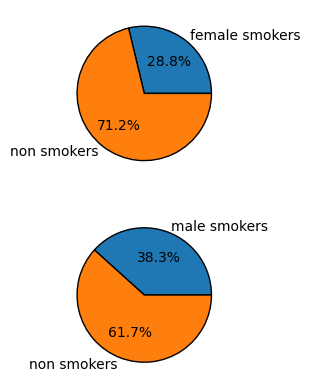

In [7]:
fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1)
ax1.pie([776,1923],labels=["female smokers","non smokers"], autopct="%1.1f%%", wedgeprops={"edgecolor":"#000000"})
ax2.pie([911,1467],labels=["male smokers","non smokers"], autopct="%1.1f%%",wedgeprops={"edgecolor":"#000000"})
plt.style.use("classic")

#higher percentage of male smokers than female smokers

22.00111234705228
14.056135770234986


Text(0.5, 1.0, 'cigsperday on average')

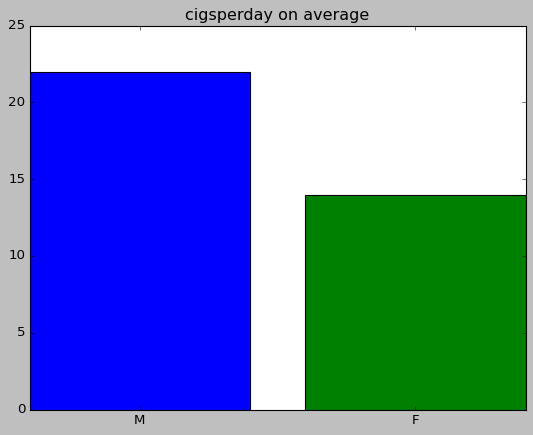

In [8]:
print((db.query("sex=='M' and is_smoking=='YES'"))["cigsPerDay"].mean())
# 22 cigs per day smoked by male smokers
print((db.query("sex=='F' and is_smoking=='YES'"))["cigsPerDay"].mean())
# 14 cigs per day smoked by female smokers
plt.bar("M",22, label="male")
plt.bar("F",14, label="female")
plt.title("cigsperday on average")
#22 cigsperday on average for men against 14 for womens

In [9]:
# db1=(db[["age","totChol"]]).sort_values(["age"])
# fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1)
# ax2.scatter(db1["age"],db1["totChol"])
# ax2.set_xlabel("age")
# ax2.set_ylabel("totChol")
# print(db1)
# db3=db1["age"].drop_duplicates()
# db2=(db1.groupby("age")).mean()["totChol"]
# ax1.plot(db3[1:-1],db2[1:-1],color="red")
# plt.figure(figsize=(20,200))

# plt.tight_layout()

# it seems there is a relation between age and totChol


education
1.0     8.713666
2.0    10.043699
3.0     7.972527
4.0     9.805405
Name: cigsPerDay, dtype: float64


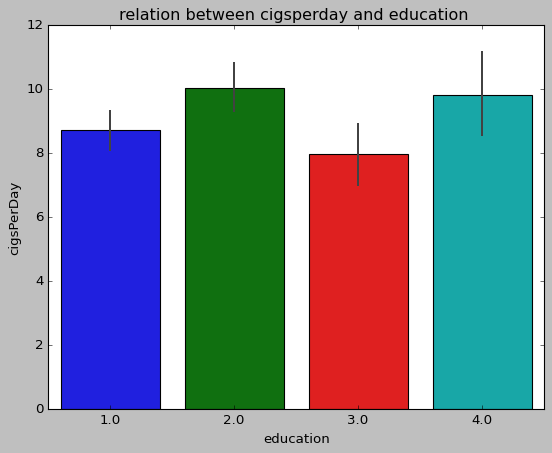

In [10]:
#correlation between education and cigs smoked per day
sns.barplot(x=db["education"], y=db["cigsPerDay"], data=db)
db1=db[["education","cigsPerDay"]].groupby("education").mean()["cigsPerDay"]
plt.title("relation between cigsperday and education ")
print(db1)

Text(0.5, 1.0, 'correlation heatmap')

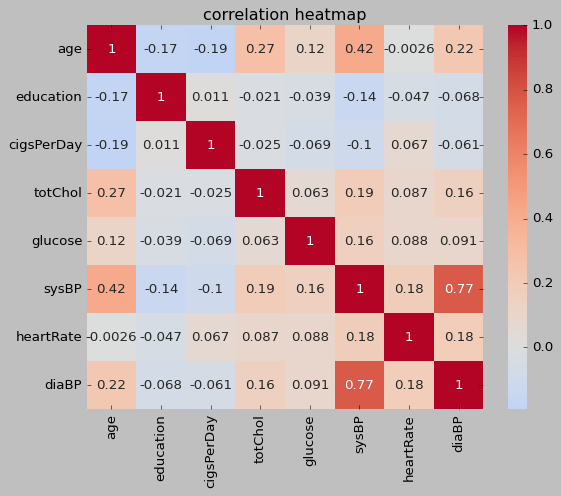

In [11]:
# anylising correlations
db["sysBP"]=pd.to_numeric(db["sysBP"], errors="coerce")
db["diaBP"]=pd.to_numeric(db["diaBP"], errors="coerce")
correlation=db[["age", "education", "cigsPerDay","totChol","glucose","sysBP","heartRate","diaBP"]].corr()
sns.heatmap(correlation,annot=True,  cmap="coolwarm", center=0)
plt.title("correlation heatmap")

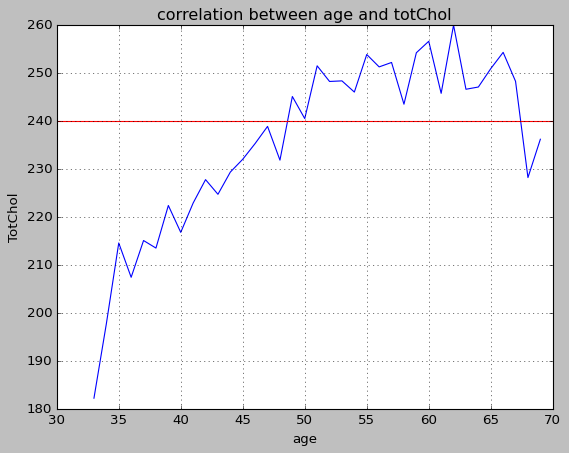

In [12]:

db1=db[["age","totChol"]].groupby("age").mean()["totChol"]
plt.plot(db1[1:-1])
plt.xlabel("age")
plt.ylabel("TotChol")
plt.grid()
plt.title("correlation between age and totChol")
plt.axhline(240,color="red")


In [13]:
import statistics
db1=list((db.sort_values(by="age"))["age"].drop_duplicates())
db2=list(db[["age","totChol"]].groupby("age").mean()["totChol"])
print(statistics.linear_regression(db1[1:-1],db2[1:-1]))
# 1.35 totchol changing on average for one year changing





LinearRegression(slope=1.321487950774841, intercept=168.31792296962834)


LinearRegression(slope=0.9708783118475341, intercept=84.16889091175898)


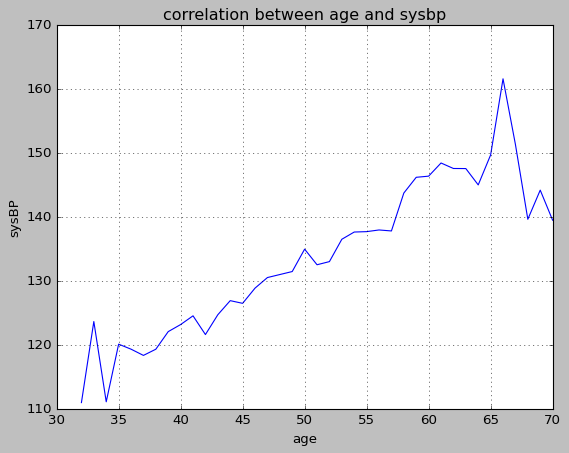

In [14]:
db1=(db[["age", "sysBP"]].groupby("age").mean()["sysBP"])
plt.plot(db1)
plt.xlabel("age")
plt.ylabel("sysBP")
plt.title("correlation between age and sysbp")
age=list(((db[["age", "sysBP"]].groupby("age").mean()["sysBP"]).reset_index())["age"])
sysbp=list(((db[["age", "sysBP"]].groupby("age").mean()["sysBP"]).reset_index())["sysBP"])
print(statistics.linear_regression(age,sysbp))
plt.grid()
# print(db1)

     totChol  sysBP  diaBP
1      113.0  120.0    NaN
2      119.0  117.0    NaN
3      124.0  138.0   91.0
4      126.0  152.0    NaN
5      129.0  109.0   69.0
..       ...    ...    ...
234    432.0  153.0   85.0
235    439.0  145.0   74.0
236    453.0  158.0  108.0
237    464.0  128.0   87.0
238    600.0    NaN   94.0

[238 rows x 3 columns]
LinearRegression(slope=0.08253504708131648, intercept=112.85169194108903)
LinearRegression(slope=0.03389733591595557, intercept=74.75462548543989)


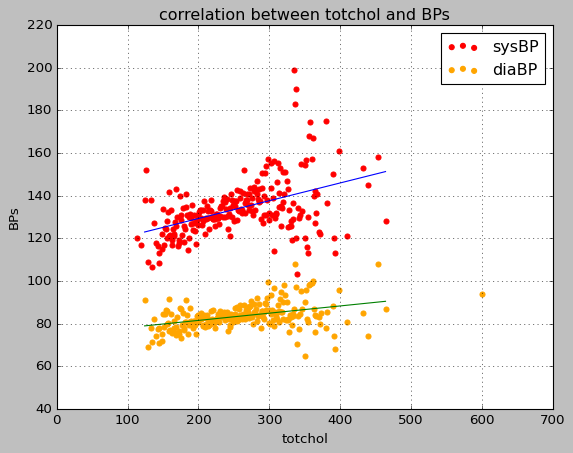

In [15]:
#correlation between chol and BPs
db1=(((db[["totChol","sysBP","diaBP"]]).groupby("totChol").mean()[["sysBP","diaBP"]]).reset_index())[1:-1]
print(db1)
plt.scatter(db1["totChol"],db1["sysBP"], color="red")
plt.scatter(db1["totChol"],db1["diaBP"], color="orange")
plt.title("correlation between totchol and BPs")
plt.xlabel("totchol")
plt.ylabel("BPs")
plt.legend(["sysBP","diaBP"])
db1=db1.dropna()
totchol=list(db1["totChol"])
sys=list(db1["sysBP"])
print(statistics.linear_regression(totchol,sys,proportional=False))
plt.grid()
slope=0.08330971323119321
intercept=112.63812843630973
plt.plot(db1["totChol"], intercept+slope*db1["totChol"])
dia=list(db1["diaBP"])
print(statistics.linear_regression(totchol,dia))
slope1=0.03389733591595557
intercept1=74.75462548543989
plt.plot(db1["totChol"],intercept1+slope1*db1["totChol"])


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'is_smoking'}>,
        <Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>],
       [<Axes: title={'center': 'prevalentHyp'}>,
        <Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>],
       [<Axes: title={'center': 'diaBP'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>]], dtype=object)

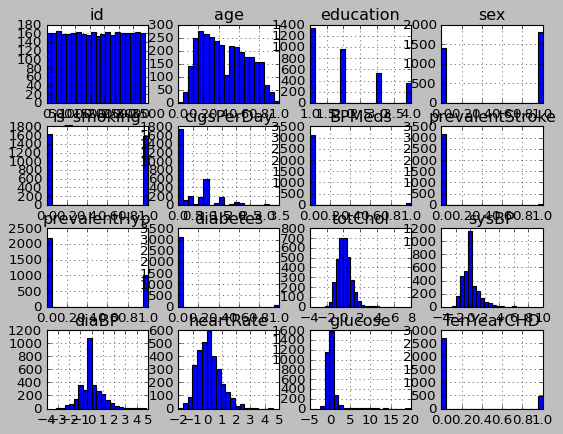

In [19]:
#Studying distribuition of data

db.hist(bins=20)

In [16]:
# Preparing data for machine learning

db.loc[db["sex"]=="F","sex"]=1.0
db.loc[db["sex"]=="M","sex"]=0.0
db.loc[db["is_smoking"]=="YES","is_smoking"]=1.0
db.loc[db["is_smoking"]=="NO","is_smoking"]=0.0
db["prevalentStroke"] = db["prevalentStroke"].astype(float)
db["prevalentHyp"] = db["prevalentHyp"].astype(float)
db["diabetes"] = db["diabetes"].astype(float)

from sklearn.preprocessing import MinMaxScaler, RobustScaler, PolynomialFeatures
x=MinMaxScaler()
y=RobustScaler()
db["age"]=x.fit_transform(db[["age"]])
db["cigsPerDay"]=y.fit_transform(db[["cigsPerDay"]])
db["totChol"]=y.fit_transform(db[["totChol"]])
db["sysBP"]=db["sysBP"].fillna(db["sysBP"].mean())
db["diaBP"]=db["diaBP"].fillna(db["diaBP"].mean())
db["sysBP"]=y.fit_transform(db[["sysBP"]])
db["diaBP"]=y.fit_transform(db[["diaBP"]])
db["heartRate"]=y.fit_transform(db[["heartRate"]])
db["glucose"]=y.fit_transform(db[["glucose"]])
db["glucose"]=db["glucose"].fillna(db["glucose"].mean())
db.dropna(inplace=True)

#casting the database in float for vif evaluation

db["sex"]=db["sex"].astype(float)
db=db.astype(float)
cor=db.corr().stack().reset_index()
cor.columns=["valore1","valore2","corr"]
cor=cor[cor["valore1"]!=cor["valore2"]]

#calculating vif

from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif=vif.sort_values(by=["VIF"],ascending=False)
    return vif
print(cal_vif(db))

          variables       VIF
4        is_smoking  4.951590
1               age  4.494985
5        cigsPerDay  4.264377
2         education  3.517055
0                id  3.364815
8      prevalentHyp  2.564615
3               sex  2.364177
11            sysBP  2.322061
12            diaBP  1.994869
14          glucose  1.679037
9          diabetes  1.648310
15       TenYearCHD  1.310599
6            BPMeds  1.145893
13        heartRate  1.096183
10          totChol  1.094194
7   prevalentStroke  1.032567


In [20]:
# Building model with logistic regression to forcast TenYearCHD
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, accuracy_score
# print(db.head())
x=db.drop(columns=["TenYearCHD"])
y=db["TenYearCHD"]
# result=cross_validate(LogisticRegression(), x ,y, cv=10)
# r2=result["test_score"].mean()
# print(r2)
model=LogisticRegression()
poly=PolynomialFeatures(degree=2, include_bias=False)
poly_x=poly.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7, random_state=0)
model.fit(x_train,y_train)
pred=model.predict(x_test)
# print(pred)
print(accuracy_score(y_test,pred))






0.850156087408949


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
